# Python API examples


## Creates

- createUser
- createMarket
- createTrade

### Create user

Creates a new user. Returns signature and verify keys.

~~~~
import requests
url = 'https://blocmarket.herokuapp.com/createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example return as json:

~~~~
{'signingKey': '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477',
 'traderId': '1',
 'verifyKey': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}
~~~~
        
### Create/update market

Creates/updates a market. Returns True and market details if successful. 

Specify:
- Market root and branch id
- Minimum and maximum outcomes
- Trader Id
- Sign and verify keys

Note that sending the private key is a terrible idea. In production signing is done on client side.

~~~~
sk = '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477'
vk = 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'
tId = 2

url = 'https://blocmarket.herokuapp.com/createMarket'
headers = {'content-type': 'application/json'}
content_makemarket = {"signingKey": sk,
                    "traderId": tId, 
                    "verifyKey": vk,
                    "marketRootId": 1, 
                    "marketBranchId": 1, 
                    "marketMin": 0,
                    "marketMax":1}

response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
~~~~

Example return as json:

~~~~
 {'allChecks': 
     "{'marketId': '1', 'marketRangeChk': True,
     'sigChk': True, 'chainChk': True, 
     'ownerChk': True, 'timeChk': True}",
 'checks': 'False',
 'marketBranchId': 1,
 'marketId': 1,
 'marketMax': 0,
 'marketMin': 1,
 'marketRootId': 1,
 'traderId': 2}
~~~~
    
### Create trade

Create a trade. Returns True and trade details if successful.

Specify:

- Trader Id
- Market Id
- Price
- Quantity
- Sign and verify keys

~~~~
url = 'https://blocmarket.herokuapp.com/createTrade'
headers = {'content-type': 'application/json'}
content_maketrade = {"signingKey": sk,
                     "traderId": int(tId),
                     "verifyKey": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)



~~~~

Example return as json:
~~~~


{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': 1,
 'traderId': 1}
~~~~

## Views

- viewMarketBounds
- viewOrderBook
- viewOpenTrades
- viewMatchedTrades

### View markets

~~~~
url = 'https://blocmarket.herokuapp.com/viewMarketBounds'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":2,"2":3,"3":4},
"marketRootId":{"0":1,"1":2,"2":3,"3":4},
"marketBranchId":{"0":1,"1":1,"2":1,"3":1},
"marketMin":{"0":0.0,"1":0.0,"2":0.0,"3":0.0},
"marketMax":{"0":0.7,"1":0.7,"2":0.7,"3":0.7}}'
~~~~

### View full order book

~~~~
url = 'https://blocmarket.herokuapp.com/viewOrderBook'
headers = {'content-type': 'application/json'}
content = {'marketId': 1}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.55,"1":0.55},
"quantity":{"0":1.0,"1":-1.0,"traderId":{"0":1,"1":1},
"iMatched":{"0":true,"1":true,
"timeStampUTC":{"0":1547976585838,"1":1547976602766}}'
~~~~

Using a stream is only necessary if the order book is large and the request is truncated by the server, but it doesn't do any harm.

### View open trades

~~~~
url = 'https://https://blocmarket.herokuapp.com/viewOpenTrades'
content = {'marketId': 1}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
~~~~

~~~~
'{"marketId":{"12":1,"15":1,"18":1,"21":1,"24":1},
"price":{"12":0.43,"15":0.43,"18":0.43,"21":0.43,"24":0.43},
"quantity":{"12":-1.0,"15":-1.0,"18":-1.0,"21":-1.0,"24":-1.0},
"traderId":{"12":1,"15":1,"18":1,"21":1,"24":1},"timeStampUTC":
{"12":1547976742476,"15":1547976750344,"18":1547976758683,"21":1547976768968,"24":1547976775537}}'
~~~~

### View matched trades

~~~~
url = 'https://blocmarket.herokuapp.com/viewMatchedTrades'
headers = {'content-type': 'application/json'}
content = {'marketId': 1}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.43,"1":0.55},"quantity":{"0":0.0,"1":0.0},"traderId":{"0":1,"1":1}}'

~~~~

### View trader summary

A view joining order book and marketTable for a particular trader.

~~~~
url = 'https://blocmarket.herokuapp.com/viewTradeSummary'
headers = {'content-type': 'application/json'}
content = {'traderId': 2}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.8,"1":0.5},
"quantity":{"0":-1.0,"1":-1.0},"traderId":{"0":2,"1":2},
"iMatched":{"0":false,"1":true},
"timeStampUTC":{"0":1547982939316,"1":1547982938964},
"marketMin":{"0":0.0,"1":0.0},"marketMax":{"0":1.0,"1":1.0}}'
~~~~


# Python demonstration

In [1530]:
import requests
import json
import numpy as np
import pandas as pd
import time

%matplotlib inline
import matplotlib.pyplot as plt

# Running flask app from powershell
# $env:FLASK_APP = "api"
# $env:FLASK_ENV = "development"
# flask run

# Running flask from terminal on OSX
# export FLASK_APP=api
# export FLASK_ENV=development
# flask run

# Running with gunicorn (heroku, digitalocean, etc):
# Procfile >
# web: gunicorn wsgi --log-file -
# wsgi.py >
# from api import app as application
#
#if __name__ == "__main__":
#    application.run()

# https://devcenter.heroku.com/articles/getting-started-with-python
# https://www.digitalocean.com/community/tutorials/how-to-serve-flask-applications-with-gunicorn-and-nginx-on-ubuntu-14-04


In [1531]:
#baseurl = 'https://blocmarket.herokuapp.com/'
# baseurl = 'http://127.0.0.1:5000/'
baseurl = 'http://127.0.0.1:7000/'

In [1532]:
# Create a new user
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1533]:
# View response as json
response.json()

{'signingKey': 'b95de2fdcc31bb6bb83f7883f634911efa20a8e9be32595b5c60666fcf08fac2',
 'traderId': '2',
 'verifyKey': 'c888bdd3d2abdf74fd5f22dd6463b916d3ea03b1c3996b897f35312a6ddca562'}

In [1534]:
# Copy keys and traderid from response
sk = response.json()['signingKey']
vk = response.json()['verifyKey']
tId = int(response.json()['traderId'])


In [1535]:
# Create a new market
mkRtId = 1
mkBrId = 1


url = baseurl + 'createMarket'
content_makemarket = {"signingKey": sk,
                        "traderId": tId, 
                        "verifyKey": vk,
                        "marketRootId": 1, 
                        "marketBranchId": mkBrId, 
                        "marketMin": 0.11,
                        "marketMax":0.7}
# Post market
response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)


In [1536]:
# response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
# View response as json
response.json()

{'allChecks': "{'inputChk': True, 'marketLimitChk': False, 'traderIdChk': True, 'marketId': '1', 'marketRangeChk': True, 'marketIndChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': False, 'timeChk': True}",
 'checks': 'False',
 'marketBranchId': 1,
 'marketId': 1,
 'marketMax': 0.7,
 'marketMin': 0.11,
 'marketRootId': 1,
 'traderId': 2}

In [1537]:
# Save market id from response
mkId = response.json()['marketId']


In [1538]:
# Create a trade
url = baseurl+'createTrade'

content_maketrade = {"signingKey": sk,
                     "traderId": tId,
                     "verifyKey": vk,
                     "marketId": mkId,
                     "price": 0.5512,
                     "quantity":1}
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [1539]:
# View response as json
response.json()

{'allChecks': "{'inputChk': True, 'traderIdChk': True, 'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.5512,
 'quantity': 1,
 'traderId': 2}

In [1540]:
# View response as a dataframe
pd.DataFrame(response.json(), index=[0])


,allChecks,checks,marketId,price,quantity,traderId
0,"{'inputChk': True, 'traderIdChk': True, 'marke...",True,1,0.5512,1,2


In [ ]:
mId = response.json()['marketId']

In [1541]:
# Create a matched trade
url = baseurl+'createTrade'
content_maketrade['quantity'] = -1
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [1542]:
# View
response.json()

{'allChecks': "{'inputChk': True, 'traderIdChk': True, 'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.5512,
 'quantity': -1,
 'traderId': 2}

In [1543]:
# Create many matched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 0.22024083137512207 seconds.
matched trade: 1 in 0.2044391632080078 seconds.
matched trade: 2 in 0.2247638702392578 seconds.
matched trade: 3 in 0.21398401260375977 seconds.
matched trade: 4 in 0.20737004280090332 seconds.


In [1544]:
content_maketrade

{'signingKey': 'b95de2fdcc31bb6bb83f7883f634911efa20a8e9be32595b5c60666fcf08fac2',
 'traderId': 2,
 'verifyKey': 'c888bdd3d2abdf74fd5f22dd6463b916d3ea03b1c3996b897f35312a6ddca562',
 'marketId': 1,
 'price': 0.5512,
 'quantity': 1}

In [1545]:
# Create many markets
url = baseurl+'createMarket'

for i in range(10):
    t = time.time()

    content_makemarket = {"signingKey": sk,
      "traderId": int(tId), "verifyKey": vk,
      "marketRootId": i+1, "marketBranchId": 1, "marketMin": 0, "marketMax":0.7}

    response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
    if response.json()['checks'] == 'True':
        print('market created: ' + str(i+1) + ' in ' + str(time.time() - t) + ' seconds.')
    else:
        print('failed to create market ' +str(i+1))
    

failed to create market 1
failed to create market 2
failed to create market 3
failed to create market 4
failed to create market 5
failed to create market 6
failed to create market 7
failed to create market 8
failed to create market 9
failed to create market 10


In [1546]:
response.json()

{'allChecks': "{'inputChk': True, 'marketLimitChk': False, 'traderIdChk': True, 'marketId': '16', 'marketRangeChk': True, 'marketIndChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': True, 'timeChk': True}",
 'checks': 'False',
 'marketBranchId': 1,
 'marketId': 16,
 'marketMax': 0.7,
 'marketMin': 0,
 'marketRootId': 10,
 'traderId': 2}

In [1555]:
# Create many sub-markets
url = baseurl+'createMarket'
marketRootId = tId

for i in range(10):
    t = time.time()

    content_makemarket = {"signingKey": sk,
      "traderId": int(tId), "verifyKey": vk,
      "marketRootId": marketRootId, "marketBranchId": 1+i, "marketMin": 0, "marketMax":0.7}

    response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
    if response.json()['checks'] == 'True':
        print('market created: ' + str(i+1) + ' in ' + str(time.time() - t) + ' seconds.')
    else:
        print('failed to create sub market ' +str(i+1))
    

failed to create sub market 1
market created: 2 in 5.375411033630371 seconds.
market created: 3 in 5.8327178955078125 seconds.
market created: 4 in 5.644144773483276 seconds.
market created: 5 in 5.8399858474731445 seconds.
market created: 6 in 5.717195987701416 seconds.
market created: 7 in 5.779947996139526 seconds.
market created: 8 in 5.856364727020264 seconds.
market created: 9 in 5.640228271484375 seconds.
market created: 10 in 5.624169826507568 seconds.


In [1556]:
response.json()

{'allChecks': "{'inputChk': True, 'marketLimitChk': True, 'traderIdChk': True, 'marketId': '24', 'marketRangeChk': True, 'marketIndChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': True, 'timeChk': True}",
 'checks': 'True',
 'marketBranchId': 10,
 'marketId': 24,
 'marketMax': 0.7,
 'marketMin': 0,
 'marketRootId': 2,
 'traderId': 2}

In [1558]:
# View maximum and minimum of each market
url = baseurl+'viewMarketBounds'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)


In [1559]:
pd.read_json(response.json())


,marketId,marketRootId,marketBranchId,marketMin,marketMax
0,1,1,1,0.11,0.7
1,2,2,1,0.00,0.7
10,11,1,6,0.11,0.7
11,12,1,7,0.11,0.7
12,13,1,8,0.11,0.7
13,14,1,9,0.11,0.7
14,15,1,10,0.11,0.7
15,16,2,2,0.00,0.7
16,17,2,3,0.00,0.7
17,18,2,4,0.00,0.7


In [1567]:
# View whole order book
url = baseurl+'viewOrderBook'
content = {'marketId': mkId}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)

In [1568]:
pd.read_json(response.json())


,marketId,price,quantity,traderId,iMatched,timeStampUTC
0,1,0.55,1,1,True,2019-02-09 01:06:43.293
1,1,0.55,-1,1,True,2019-02-09 01:07:02.601
10,1,0.55,-1,1,True,2019-02-09 01:07:12.798
100,1,0.47,-1,1,True,2019-02-09 01:08:40.080
101,1,0.49,-1,1,True,2019-02-09 01:08:39.868
102,1,0.49,1,1,True,2019-02-09 01:08:40.174
103,1,0.48,1,1,True,2019-02-09 01:08:40.274
104,1,0.48,-1,1,True,2019-02-09 01:08:40.597
105,1,0.50,-1,1,True,2019-02-09 01:08:40.380
106,1,0.50,1,1,True,2019-02-09 01:08:40.718


In [1569]:
content_makemarket

{'signingKey': 'b95de2fdcc31bb6bb83f7883f634911efa20a8e9be32595b5c60666fcf08fac2',
 'traderId': 2,
 'verifyKey': 'c888bdd3d2abdf74fd5f22dd6463b916d3ea03b1c3996b897f35312a6ddca562',
 'marketRootId': 2,
 'marketBranchId': 10,
 'marketMin': 0,
 'marketMax': 0.7}

In [1570]:
# Create many unmatched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    content_maketrade['price'] = 0.43
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('unmatched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


unmatched trade: 0 in 0.11990213394165039 seconds.
unmatched trade: 1 in 0.10194826126098633 seconds.
unmatched trade: 2 in 0.10086512565612793 seconds.
unmatched trade: 3 in 0.10676717758178711 seconds.
unmatched trade: 4 in 0.0969700813293457 seconds.


In [1571]:
a = response.json()
a

{'allChecks': "{'inputChk': True, 'traderIdChk': True, 'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.43,
 'quantity': -1,
 'traderId': 2}

In [1574]:
# View all open (unmatched trades)
url = baseurl+'viewOpenTrades'

content = {'marketId': mkId}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1575]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,timeStampUTC
12,1,0.43,-1,1,2019-02-09 01:08:20.955
15,1,0.43,-1,1,2019-02-09 01:08:21.160
18,1,0.43,-1,1,2019-02-09 01:08:21.366
21,1,0.43,-1,1,2019-02-09 01:08:21.561
239,1,0.43,-1,2,2019-02-09 04:06:13.922
24,1,0.43,-1,1,2019-02-09 01:08:21.767
240,1,0.43,-1,2,2019-02-09 04:06:14.022
241,1,0.43,-1,2,2019-02-09 04:06:14.120
242,1,0.43,-1,2,2019-02-09 04:06:14.226
243,1,0.43,-1,2,2019-02-09 04:06:14.325


In [1576]:
# View matched trades (summed over marketId/price/traderId)
url = baseurl+'viewMatchedTrades'
content = {'marketId': mkId}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)

In [1577]:
pd.read_json(response.json())

,marketId,price,quantity,traderId
0,1,0.43,0,1
1,1,0.47,0,1
2,1,0.48,0,1
3,1,0.49,0,1
4,1,0.50,0,1
5,1,0.51,0,1
6,1,0.52,0,1
7,1,0.53,0,1
8,1,0.55,0,1
9,1,0.55,0,2


In [1578]:
# Create many matched trades (own)
url = baseurl+'createTrade'

for i in range(5): 
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 0.2170569896697998 seconds.
matched trade: 1 in 0.19997477531433105 seconds.
matched trade: 2 in 0.20141100883483887 seconds.
matched trade: 3 in 0.2033710479736328 seconds.
matched trade: 4 in 0.19483494758605957 seconds.


In [1579]:
# View summary of trader for a particular trader
url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)

In [1580]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketRootId,marketBranchId,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,1,0.55,1,2,True,2019-02-09 04:01:28.188,1,1,0.11,0.7,-0.44,0.15
1,1,0.55,-1,2,True,2019-02-09 04:01:29.751,1,1,0.11,0.7,0.44,-0.15
10,1,0.55,-1,2,True,2019-02-09 04:01:31.558,1,1,0.11,0.7,0.44,-0.15
11,1,0.55,1,2,True,2019-02-09 04:01:31.658,1,1,0.11,0.7,-0.44,0.15
12,1,0.43,-1,2,False,2019-02-09 04:06:13.922,1,1,0.11,0.7,0.32,-0.27
13,1,0.43,-1,2,False,2019-02-09 04:06:14.022,1,1,0.11,0.7,0.32,-0.27
14,1,0.43,-1,2,False,2019-02-09 04:06:14.120,1,1,0.11,0.7,0.32,-0.27
15,1,0.43,-1,2,False,2019-02-09 04:06:14.226,1,1,0.11,0.7,0.32,-0.27
16,1,0.43,-1,2,False,2019-02-09 04:06:14.325,1,1,0.11,0.7,0.32,-0.27
17,1,0.43,-1,2,False,2019-02-09 04:08:45.157,1,1,0.11,0.7,0.32,-0.27


In [1581]:
# Get a signed UTC timestamp
url = baseurl+'getSignedUTCTimestamp'
content = {}
response = requests.get(url, data=json.dumps(content), headers=headers)


In [1582]:
response.json()

{'timeStampUTC': '2019-02-09 04:09:39.263321',
 'timeStampUTCSignature': 'b"B\\xbbJz\\xa6\\xe8\\xe2@TL\\x92\\xa7\\xe2\\x00jhw\\xc2p\\x03\\xaa\\xf3C{\\xc7/qy\\xa1\\xc9\\xf9\\xbd\\x81E\\x899\\x100\\x01\\xcf\\x91\\x86G\\xd9\\xea\\x93D\\xed\\xbb\\xb0!\'\\xc7\\x81\\xd0\\xa8\\x80_\\xbf G\\x0e\\x87\\x0f"',
 'verifyKey': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}

In [1583]:
# A simple robot making a bid/offer with an OU process

url = baseurl+'createTrade'

m = 0.5
k = -0.001
v = 0.01
B = m

for i in range(50):
    # Create bounded [0,1] random reverting to m
    dW = np.random.normal()
    if i==0:
        dLnB = v*dW
    else:
        dLnB = -k*(np.log(B)-m) + v*dW
    
    # Bound between zero and one
    B *= np.exp(dLnB)
    B = min(max(B, 0.01),0.99)
    
    # Make a bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Make an offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    time.sleep(0.1)
    
    # Remove bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =-1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Remove offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = 1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('Price for iteration ' + str(i) + ' : ' + str(content_maketrade['price']))

Price for iteration 0 : 0.5154769200501018
Price for iteration 1 : 0.5103043906858229
Price for iteration 2 : 0.512614434982629
Price for iteration 3 : 0.5094957109271246
Price for iteration 4 : 0.5115545354293504
Price for iteration 5 : 0.5211023500803162
Price for iteration 6 : 0.5215927182074842
Price for iteration 7 : 0.5167542753494876
Price for iteration 8 : 0.5060291127136107
Price for iteration 9 : 0.5081489428633499
Price for iteration 10 : 0.5038043417013833
Price for iteration 11 : 0.49931767859876086
Price for iteration 12 : 0.5079227823162579
Price for iteration 13 : 0.5082275521084447
Price for iteration 14 : 0.5067160201520116
Price for iteration 15 : 0.5028847876629228
Price for iteration 16 : 0.5041590303348801
Price for iteration 17 : 0.5074883945674562
Price for iteration 18 : 0.5106659088698844
Price for iteration 19 : 0.5144584258655278
Price for iteration 20 : 0.5171882977565602
Price for iteration 21 : 0.5175567730112036
Price for iteration 22 : 0.517809431442699

In [1584]:
# Get summary for this market and plot

url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
a = pd.read_json(response.json())
a = a[a['marketId'] == mkId]
a = a.set_index(a['timeStampUTC'])
a


,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketRootId,marketBranchId,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
timeStampUTC,,,,,,,,,,,,
2019-02-09 04:01:28.188,1,0.55,1,2,True,2019-02-09 04:01:28.188,1,1,0.11,0.7,-0.44,0.15
2019-02-09 04:01:29.751,1,0.55,-1,2,True,2019-02-09 04:01:29.751,1,1,0.11,0.7,0.44,-0.15
2019-02-09 04:01:31.558,1,0.55,-1,2,True,2019-02-09 04:01:31.558,1,1,0.11,0.7,0.44,-0.15
2019-02-09 04:09:57.488,1,0.50,-1,2,False,2019-02-09 04:09:57.488,1,1,0.11,0.7,0.39,-0.20
2019-02-09 04:09:57.765,1,0.52,-1,2,False,2019-02-09 04:09:57.765,1,1,0.11,0.7,0.41,-0.18
2019-02-09 04:09:57.968,1,0.50,-1,2,False,2019-02-09 04:09:57.968,1,1,0.11,0.7,0.39,-0.20
2019-02-09 04:09:58.241,1,0.52,-1,2,False,2019-02-09 04:09:58.241,1,1,0.11,0.7,0.41,-0.18
2019-02-09 04:09:58.441,1,0.50,-1,2,False,2019-02-09 04:09:58.441,1,1,0.11,0.7,0.39,-0.20
2019-02-09 04:09:58.715,1,0.51,-1,2,False,2019-02-09 04:09:58.715,1,1,0.11,0.7,0.40,-0.19


Text(0.5, 1.0, 'Time series for market 1 / trader 2')

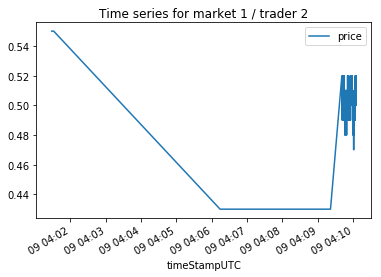

In [1585]:
plt.figure(); a['price'].plot(); plt.legend(loc='best'); plt.title('Time series for market ' + str(mkId) + ' / trader ' +str(tId))


# Curl API examples



## Create user

~~~~
curl --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createUser
~~~~
        
## Create market

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketRootId": 1, 
"marketBranchId": 5, 
"marketMin": 0, 
"marketMax": 1}' 
--header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createMarket
~~~~
    
## Create trade

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketId": 1,
"price": 0.1212,
"quantity": 1}' --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createTrade

~~~~
        
## View order book (output to file)

~~~~
curl --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/viewOrderBook --output ob.txt
~~~~    
        
Also can load json from file with something like 
~~~~ 
curl -d "@data.json" -X POST http://blocmarket.herokuapp.com/data 
~~~~


# Matlab API examples


## Create user

~~~~
resp = webread('http://blocmarket.herokuapp.com/createUser')

~~~~

Returns something like

~~~~
'{"signingKey": '57f611e7cb7c5d4123be69663ccd06442c64db1a4f1161399dbb1b9bb6cc0e06'
           "traderId": '2'
      "verifyKey": 'ddaa5b0119a4ccfeffa36be0e6aac3682f798d021d5ded1d90512f2226e727b5'}'
~~~~

## Create market

~~~~
data = struct('signingKey', signingKey,...
'traderId', tId, ...
'verifyKey', verifyKey ,...
'marketRootId', 2, ...
'marketBranchId', 1, ...
'marketMin', 0.01, ...
'marketMax', 1)
resp = webwrite('http://blocmarket.herokuapp.com/createMarket', data, weboptions('RequestMethod', 'post','MediaType', 'application/json'))
~~~~

Returns something like

~~~~
'{
             "checks": 'True'
     "marketBranchId": 1
          "marketMax": 1
          "marketMin": 0.0100
       "marketRootId": 2
           "traderId": 1
}'
~~~~
## Create trade

~~~~
data = struct('signingKey', signingKey,...
'traderId', tId,...
'verifyKey', verifyKey ,...
'marketId', 1,...
'price', 0.51,...
'quantity', 1)
resp = webwrite('http://blocmarket.herokuapp.com/createTrade', data, weboptions('MediaType', 'application/json'))
~~~~

Returns something like
~~~~
'{
       "checks": 'True'
     "marketId": 1
        "price": 0.5100
     "quantity": 1
     "traderId": 1
 '}S
~~~~

## View market bounds
~~~~
data = struct('marketId', 1)
resp = webwrite('http://blocmarket.herokuapp.com/viewMarketBounds', data, weboptions('RequestMethod', 'post','contentType', 'json', 'Timeout', 10))
~~~~

## View order book
~~~~
data = struct('marketId':1)
resp = webwrite('http://blocmarket.herokuapp.com/viewOrderBook', data, weboptions('RequestMethod', 'post','contentType', 'json'), 'Timeout', 10)
~~~~

## View trade summary

~~~~
data = struct('traderId',1);
resp = webwrite('http://blocmarket.herokuapp.com/viewTradeSummary', data, weboptions('RequestMethod', 'post','MediaType', 'application/json', 'Timeout', 10))
~~~~


# Powershell

TODO


    

test cases with mismatched traderId/verifyKey
views to specific market
javascript/powershell for api
enforce max decimals
table based checkcollateral
put up on digitalocean

write up another layer of trading interface

In [1466]:
round(12.3335,2)


12.33